In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv
# print without scientific notation (e)
np.set_printoptions(suppress=True)

In [2]:
# loading the data into a dataframe.
Salary_df = pd.read_csv('SalaryData.csv')
Salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,6.8,91738.0
5,2.2,39891.0
6,2.9,56642.0
7,3.2,54445.0
8,3.2,64445.0
9,9.0,105582.0


In [3]:
# Define constants.
Prior_Means = np.array([[40000],[0]])

# eye creates an identity 4x4 matrix.
Prior_Cov = np.eye(4) * 100
measurement_sigma = 250
# predictions of y's.
y_hats = np.zeros((30,1))


In [4]:
for index, row in Salary_df.iterrows():
    t = row['YearsExperience']
    y = row['Salary']
    H_k = np.array([[1, t]])
    current_Means = Prior_Means
    current_Covariances = Prior_Cov
    # current_Cov and Means is respectively P_k-1 and m_k-1, H_k is the current data point.
    # operator @ is matrix multiplication and .T is transpose.
    Prior_Cov = current_Covariances - current_Covariances @ H_k.T \
    @ (H_k @ current_Covariances @ H_k.T + measurement_sigma**2)**(-1) \
    @  (H_k @ current_Covariances)
    Prior_Means = Prior_Cov @ (H_k.T * measurement_sigma**(-2) * y  + \
        inv(current_Covariances) @ current_Means)
    # if index==9:
    #     print (y)
    #     break
print(Prior_Cov)
print(Prior_Means)
    

[[97.64067251 -9.12572454]
 [-9.12572454 37.49905628]]
[[40527.16900322]
 [ 4609.75095918]]


In [5]:
# H = np.empty((30,4), float)
# Y = np.empty((1,30), float)
# for index, row in Salary_df.iterrows():
#     t = row['YearsExperience']
#     y = row['Salary']
#     H[index] = [1, t, t**2, t**3]
#     Y[0,index] = y

# current_Means = Prior_Means
# current_Covariances = Prior_Cov
# # current_Cov and Means is respectively P_k-1 and m_k-1, H_k is the current data point.
# # operator @ is matrix multiplication and .T is transpose.
# Prior_Cov = current_Covariances - current_Covariances @ H.T \
# @ (H @ current_Covariances @ H.T + measurement_sigma**2)**(-1) \
# @  (H @ current_Covariances)
# print
# Prior_Means = Prior_Cov @ (H.T * measurement_sigma**(-2) @ Y.T  + \
#     inv(current_Covariances) @ current_Means)
# print(Prior_Means)

In [7]:
# predict y's hat.
# firstly we need to derive the thetas from a multivariate normal distribtuion with the new means and cov.
# set the seed so we get the same values for theta
np.random.seed(50)
thetas = np.random.multivariate_normal(Prior_Means.reshape(3,), Prior_Cov)
print(thetas)
# for each example we predict the y_hat.
for index, row in Salary_df.iterrows():
    t = row['YearsExperience']
    y_hats[index] = thetas[0] + thetas[1] * t + thetas[2] * t ** 2

[40542.49840534  4607.2878615 ]


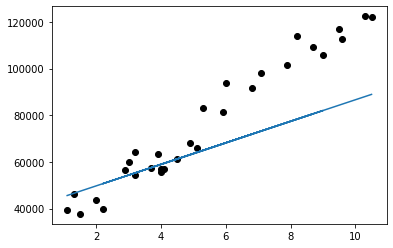

In [8]:
#plotting the true values of y

plt.plot(Salary_df['YearsExperience'], Salary_df['Salary'], 'o', color = 'black')
plt.plot(Salary_df['YearsExperience'], y_hats)